In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [130]:
# Read the CSV file into a data frame
data <- read.csv("house_price_clean.csv")

# View the first few rows of the data frame
head(data)



,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,⋯,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,X,year
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<int>,<lgl>,<int>
1,0,Aberfeldie,241 Buckley St,4,h,1380000,VB,Nelson,8/12/2017,7.5,⋯,766,126,1970,Moonee Valley,-37.75595,144.9055,Western Metropolitan,1543,NA,2017
2,1,Northcote,67 Charles St,2,h,1100000,SP,Jellis,5/20/2017,5.5,⋯,189,126,1970,Darebin,-37.77670,144.9924,Northern Metropolitan,11364,NA,2017
3,2,Balwyn North,42 Maud St,3,h,1480000,PI,Jellis,10/15/2016,9.2,⋯,605,116,1950,Boroondara,-37.79510,145.0696,Southern Metropolitan,7809,NA,2016
4,3,Brunswick,13 Percy St,3,h,1055000,S,Nelson,5/7/2016,5.2,⋯,324,126,1930,Moreland,-37.76530,144.9586,Northern Metropolitan,11918,NA,2016
5,4,Templestowe Lower,253 Thompsons Rd,4,h,1000000,VB,hockingstuart,8/13/2016,13.8,⋯,728,164,1970,Manningham,-37.76800,145.1027,Eastern Metropolitan,5420,NA,2016
6,5,Coburg,4/34 Gladstone St,2,u,650000,S,Barry,4/29/2017,7.8,⋯,136,81,1975,Moreland,-37.74490,144.9754,Northern Metropolitan,11204,NA,2017


In [131]:


data <- data[0:5432,]


In [137]:
#reorder the columns
data <-data   %>%
  select(Rooms, Distance, Bedroom2, Bathroom,Car,Landsize,BuildingArea,Propertycount,Lattitude,Longtitude,Price)


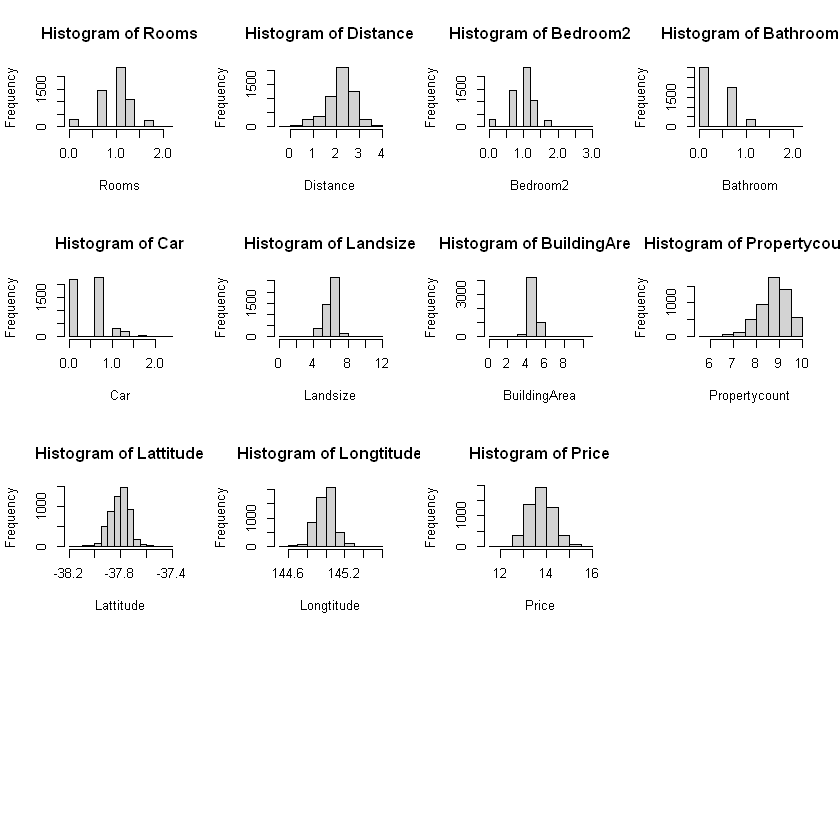

In [139]:
par(mfrow=c(ceiling(sqrt(ncol(data))), ceiling(sqrt(ncol(data)))))

# Loop through each column and plot its histogram
for (col in names(data)) {
  hist(data[[col]], main=paste("Histogram of", col), xlab=col)
}

In [140]:
# Apply log transformation to 'Rooms' column
data$Rooms <- log(data$Rooms)

# Apply log transformation to 'Distance' column
data$Distance <- log(data$Distance)

# Apply log transformation to 'Bedroom2' column
data$Bedroom2 <- log(data$Bedroom2)

# Apply log transformation to 'Bathroom' column
data$Bathroom <- log(data$Bathroom)

# Apply log transformation to 'Car' column
data$Car <- log(data$Car)

# Apply log transformation to 'Landsize' column
data$Landsize <- log(data$Landsize)

# Apply log transformation to 'BuildingArea' column
data$BuildingArea <- log(data$BuildingArea)

# Apply log transformation to 'Propertycount' column
data$Propertycount <- log(data$Propertycount)

# Apply log transformation to 'Price' column
data$Price <- log(data$Price)

Warning message in log(data$Distance):
"NaNs produced"
Warning message in log(data$Bedroom2):
"NaNs produced"
Warning message in log(data$Bathroom):
"NaNs produced"
Warning message in log(data$Car):
"NaNs produced"
Warning message in log(data$Landsize):
"NaNs produced"
Warning message in log(data$BuildingArea):
"NaNs produced"


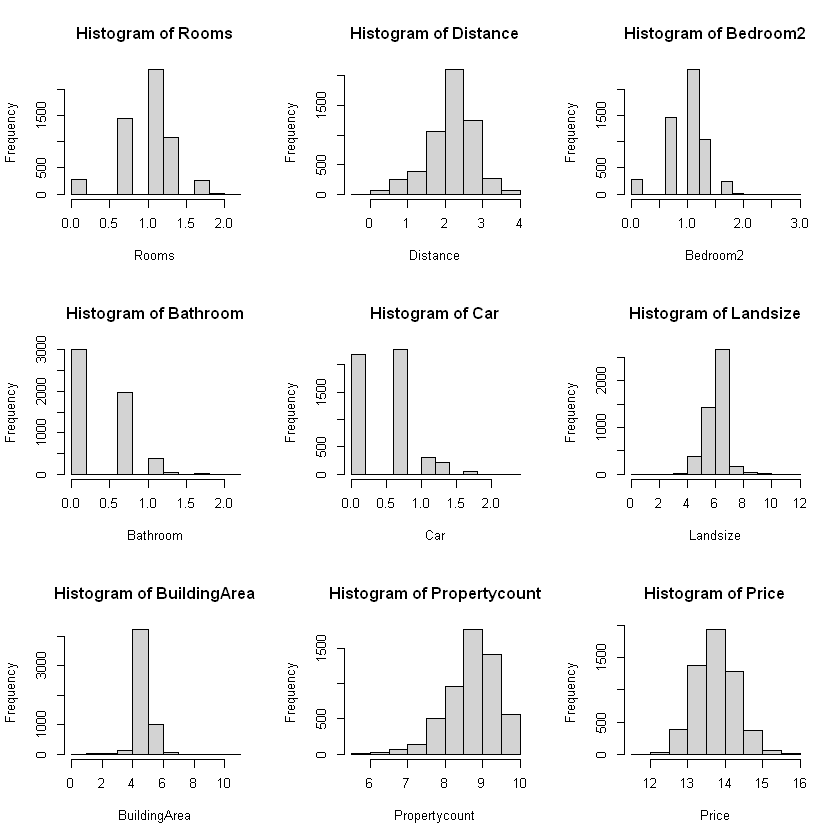

In [141]:
par(mfrow=c(ceiling(sqrt(ncol(data_2))), ceiling(sqrt(ncol(data_2)))))

# Loop through each column and plot its histogram
for (col in names(log_trans_data)) {
  hist(log_trans_data[[col]], main=paste("Histogram of", col), xlab=col)
}

In [147]:
log_trans<- data[complete.cases(data), ]

In [148]:
head(log_trans)

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Lattitude,Longtitude,Price
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.32663426,0.7005711,0.32663426,-0.36651292,-0.3665129,1.893290,1.576146,1.993541,-37.75595,144.9055,2.648837
2,-0.36651292,0.5334174,-0.36651292,-Inf,-Inf,1.656655,1.576146,2.234114,-37.77670,144.9924,2.632667
3,0.09404783,0.7971483,0.09404783,-Inf,0.3266343,1.857115,1.558900,2.193109,-37.79510,145.0696,2.653774
4,0.09404783,0.4999620,0.09404783,-Inf,-Inf,1.754532,1.576146,2.239198,-37.76530,144.9586,2.629660
5,0.32663426,0.9649546,0.32663426,0.09404783,-0.3665129,1.885599,1.629214,2.151512,-37.76800,145.1027,2.625792
6,-0.36651292,0.7198494,-0.36651292,-Inf,-Inf,1.591815,1.480342,2.232595,-37.74490,144.9754,2.594114


In [83]:
log_trans_data<- data[complete.cases(log_trans_data), ]

In [84]:

mlr_model <- lm(Price ~ Rooms + Distance + Bedroom2 + Bathroom + Car + Landsize + BuildingArea + Propertycount + Latitude + Longitude , data = log_trans_data)

mlr_model$coefficients

ERROR: Error in eval(predvars, data, env): object 'Latitude' not found


### F Test

Assuming the significance level  $\alpha = 0.05 $ to determine if atleast one of the features is related to the response variable Y

In [32]:
anova(mlr_model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Rooms,1,5.570352e+14,5.570352e+14,2200.1160621,0.000000e+00
Distance,1,2.446908e+14,2.446908e+14,966.4527350,2.091520e-195
Bedroom2,1,1.664257e+12,1.664257e+12,6.5732968,1.037871e-02
Bathroom,1,8.453977e+13,8.453977e+13,333.9058459,1.948331e-72
Car,1,1.029293e+13,1.029293e+13,40.6538833,1.967644e-10
Landsize,1,2.119875e+12,2.119875e+12,8.3728460,3.823866e-03
BuildingArea,1,4.705531e+11,4.705531e+11,1.8585387,1.728501e-01
Propertycount,1,9.257653e+10,9.257653e+10,0.3656486,5.454111e-01
Residuals,5423,1.373019e+15,2.531845e+11,NA,NA


$H_o = $ No Feature is related to the response variable "Price"


$H_A = $ Atleast one feature is related to the response variable "Price" 


From the results tables we can clearly see that many features has P-value less than the significance level. 






### Diagnostics

Goodnees of Fit

In [34]:
summary(mlr_model)


Call:
lm(formula = Price ~ Rooms + Distance + Bedroom2 + Bathroom + 
    Car + Landsize + BuildingArea + Propertycount, data = log_trans_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2420316  -296233   -87699   211870  5403596 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.996e+05  2.691e+04   7.416 1.40e-13 ***
Rooms          2.913e+05  1.895e+04  15.368  < 2e-16 ***
Distance      -3.779e+04  1.220e+03 -30.981  < 2e-16 ***
Bedroom2       2.274e+03  1.803e+04   0.126   0.8996    
Bathroom       2.097e+05  1.213e+04  17.288  < 2e-16 ***
Car            4.859e+04  7.816e+03   6.217 5.45e-10 ***
Landsize       1.040e+01  4.774e+00   2.179   0.0294 *  
BuildingArea   1.630e+01  1.206e+01   1.352   0.1765    
Propertycount -9.492e-01  1.570e+00  -0.605   0.5454    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 503200 on 5423 degrees of freedom
Multiple R-squared:  0.3962,	Adjusted R-

The $R^2 = 0.3962 $ is low it shows that we need to work in the feature selection process by using the forward select method. 

### Forward Select

In [47]:
forward_select <- function(df, resp_str, maxk) {
  selected_features <- c() 
  other_feat <- setdiff(names(df), resp_str)
  Y <- df[[resp_str]]
  for (k in 1:maxk) {
    best_feature <- NULL
    low_sse <- Inf  
    
    for (feature in other_feat) {
      input_feature <- c(selected_features, feature)
      model <- lm(paste(resp_str, "~", paste(input_feature, collapse = " + ")), data = df)
      y_hat <- predict(model, newdata = df)
      sse <- sum((Y - y_hat)^2)
      
      if (sse < low_sse) {  
        low_sse <- sse  # Corrected variable name here
        best_feature <- feature
      }
    }
    selected_features <- c(selected_features, best_feature)
    other_feat <- setdiff(other_feat, best_feature)
    
    cat(paste("Step: ", k, " ", best_feature, " has been added.\n" ))
  }
  
  return(selected_features)
}

forward_select(data, "Price",8)

Step:  1   Rooms  has been added.
Step:  2   Distance  has been added.
Step:  3   Bathroom  has been added.
Step:  4   Car  has been added.
Step:  5   Landsize  has been added.
Step:  6   BuildingArea  has been added.
Step:  7   Propertycount  has been added.
Step:  8   Bedroom2  has been added.


[1] "Rooms"         "Distance"      "Bathroom"      "Car"          
[5] "Landsize"      "BuildingArea"  "Propertycount" "Bedroom2"

In [48]:

mlr_model <- lm(Price ~ Rooms + Distance  + Bathroom + Car + Landsize  + BuildingArea  , data = log_trans_data)

mlr_model$coefficients

(Intercept)        Rooms     Distance     Bathroom          Car     Landsize 
191502.71927 293687.52979 -37756.42145 209976.67488  48525.81592     10.37650 
BuildingArea 
    16.42664

In [49]:
summary(mlr_model)


Call:
lm(formula = Price ~ Rooms + Distance + Bathroom + Car + Landsize + 
    BuildingArea, data = log_trans_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2417080  -296798   -88472   210646  5406681 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  191502.719  23211.709   8.250  < 2e-16 ***
Rooms        293687.530   9425.864  31.158  < 2e-16 ***
Distance     -37756.421   1217.565 -31.010  < 2e-16 ***
Bathroom     209976.675  12053.472  17.420  < 2e-16 ***
Car           48525.816   7806.569   6.216 5.48e-10 ***
Landsize         10.377      4.773   2.174   0.0297 *  
BuildingArea     16.427     12.052   1.363   0.1729    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 503100 on 5425 degrees of freedom
Multiple R-squared:  0.3961,	Adjusted R-squared:  0.3955 
F-statistic: 593.2 on 6 and 5425 DF,  p-value: < 2.2e-16
